In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
%matplotlib inline

In [135]:
## matplotlib settings
plt.rcParams['figure.figsize']=16,10
plt.rcParams.update({'font.size': 12, 
                            'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [162]:
# seaborn settings
seaborn.set_palette('deep', desat=.6)
#seaborn.set_context(rc={'figure.figsize':(8,4)})

In [2]:
data= pd.read_csv('hard_drive_data_2015.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'date', 'serial_number', 'model', 'capacity_bytes',
       'failure', 'smart_1_normalized', 'smart_1_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_9_normalized', 'smart_9_raw',
       'smart_194_normalized', 'smart_194_raw', 'smart_197_normalized',
       'smart_197_raw', 'smart_224_normalized', 'smart_224_raw'],
      dtype='object')

In [4]:
data.head(5)

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_224_normalized,smart_224_raw
0,0,2015-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,100.0,0.0,98.0,19169.0,253.0,22.0,100.0,0.0,NaN,NaN
1,1,2015-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,100.0,2.0,98.0,19235.0,250.0,24.0,100.0,0.0,NaN,NaN
2,2,2015-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,100.0,0.0,98.0,18732.0,250.0,24.0,100.0,0.0,NaN,NaN
3,3,2015-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3.000593e+12,0.0,100.0,0.0,100.0,0.0,98.0,17879.0,222.0,27.0,100.0,0.0,NaN,NaN
4,4,2015-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4.000787e+12,0.0,100.0,0.0,100.0,0.0,98.0,15829.0,206.0,29.0,100.0,0.0,NaN,NaN


In [7]:
data.shape

(17509251, 18)

In [66]:
######### 1. How many models are in the data set? ##########
models= data.model.nunique()
models

78

In [118]:
models1= data.model.unique()
len(models1)

78

In [67]:
####### 2. How many disks are in the data set? ######
# disks= serial_numbers
serial_n= data.serial_number.nunique()
serial_n

62898

In [69]:
#### 3. How many capacity bites are there in the data set? ##
capacity= data.capacity_bytes.nunique()
capacity

16

In [10]:
############# 4.  How many disks are per model? ##################
# One way to compute the number of disks per model is the following:
data.model.value_counts().sort_values(). head(3)
# THIS IS WRONG!!! because the disks that still work are counted again

WDC WD5000AAJS     7
WDC WD30EZRX      43
ST320005XXXX      67
Name: model, dtype: int64

In [287]:
### the disks are labeled by their serial number. Therefore,
### I have to count the number of UNIQUE serial numbers per model
# I create a new table with this information
c= pd.DataFrame(data.groupby(['model']).serial_number.nunique() )
c= c.reset_index()
c= c.sort_values(by='serial_number')
c.head()

,model,serial_number
48,WDC WD15EARS,1
32,ST3500320AS,1
53,WDC WD2500AAJB,1
6,Hitachi HDS5C3030BLE630,1
55,WDC WD2500BEVT,1


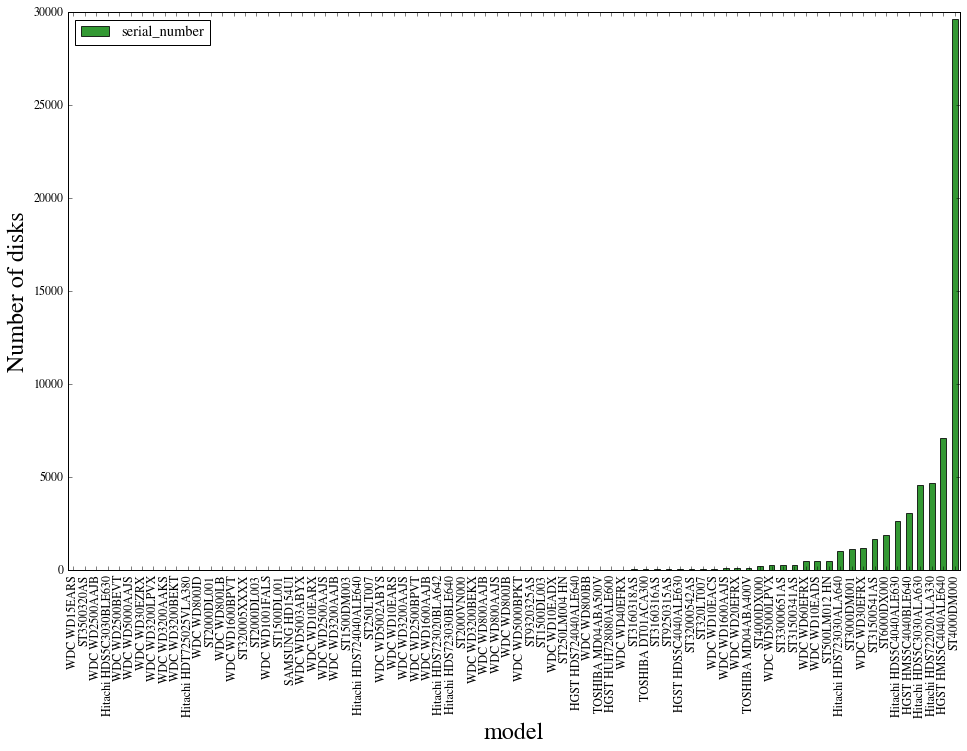

In [94]:
ax=c.plot(kind='bar', x= 'model', y='serial_number', color='green', alpha= 0.8)
ax.set_xlabel('model', fontsize= 24)
ax.set_ylabel('Number of disks', fontsize= 24)

In [55]:
#which model has the minimum number of disks?
minimum= c.serial_number.argmin() 
c.loc[minimum]

model            WDC WD15EARS
serial_number               1
Name: 48, dtype: object

In [65]:
#which model has the maximum number of disks?
maximum= c.serial_number.argmax()
c.loc[maximum]

model            ST4000DM000
serial_number          29670
Name: 33, dtype: object

In [121]:
##### 5. How many disks are there per capacity bytes? ##########
capacity= pd.DataFrame(data.groupby(['capacity_bytes']).serial_number.nunique() )
capacity= capacity.reset_index()
capacity= capacity[capacity.capacity_bytes >0]
capacity.capacity_bytes /= 1e12

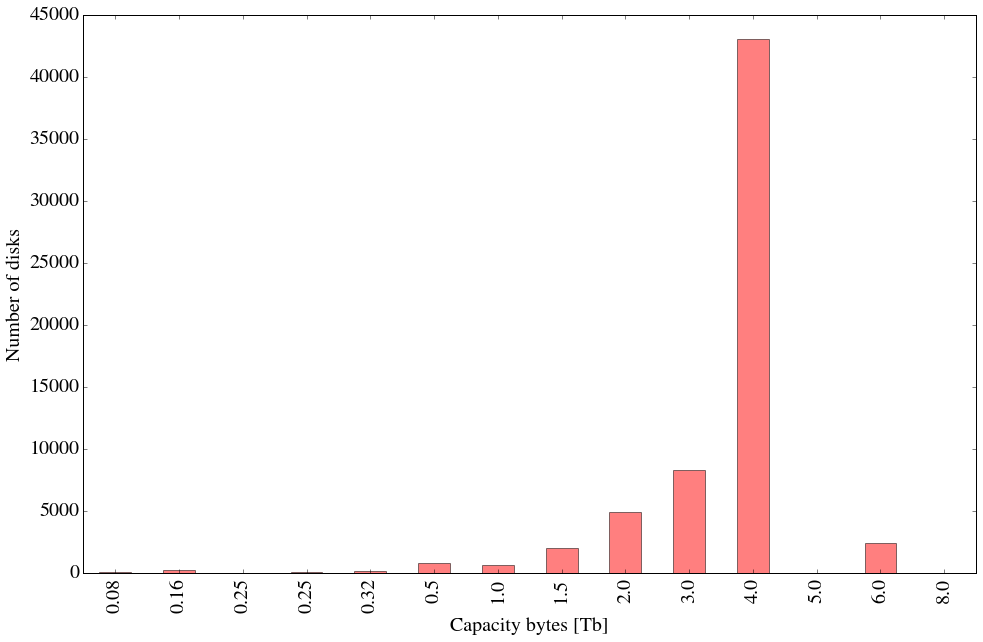

In [122]:
capacity.capacity_bytes= capacity.capacity_bytes.round(2)
ax= capacity.plot(kind='bar', x='capacity_bytes' , y='serial_number', 
              fontsize= 20, color= 'red', alpha= 0.5, legend=False)
ax.set_xlabel('Capacity bytes [Tb]', fontsize=30)
ax.set_ylabel('Number of disks', fontsize=30)

In [ ]:
############### 6. How many capacity bytes are there per model? #####
capacity_b= pd.DataFrame(data.groupby(['model', 'capacity_bytes']).serial_number.nunique() )
capacity_b= capacity_b.reset_index()
capacity_b.head()

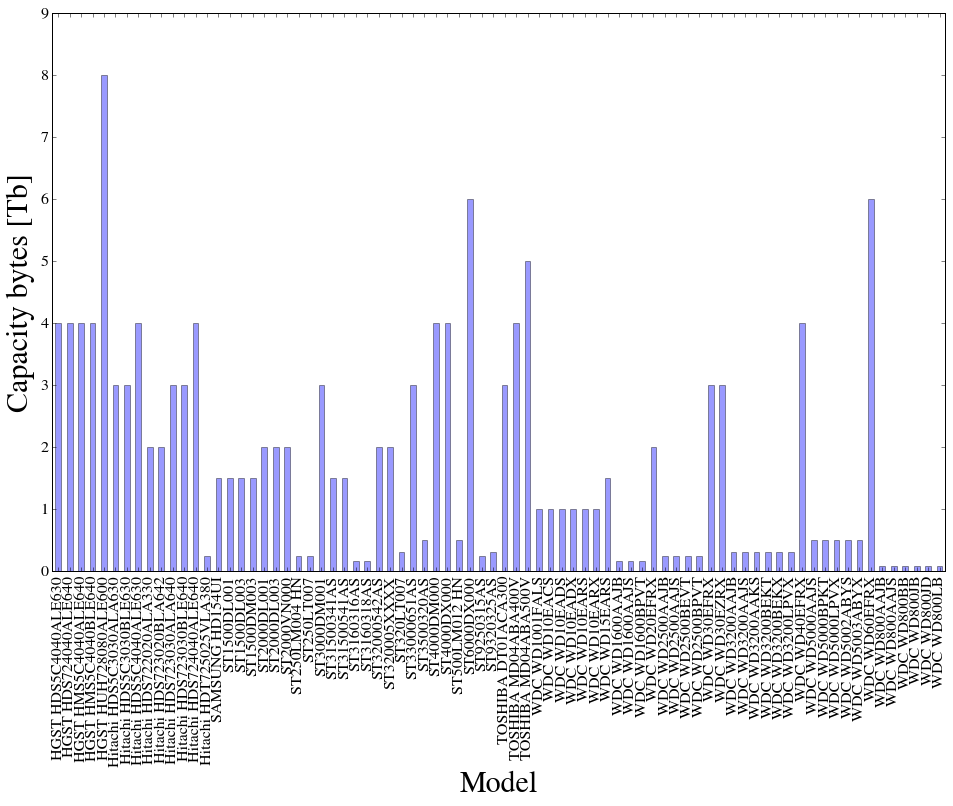

In [357]:
# In the analysis I remove negative capacities
capacity_b= capacity_b[capacity_b.capacity_bytes> 0]
capacity_b.capacity_bytes /= 1e12
ax= capacity_b.plot(x='model', y='capacity_bytes', kind= 'bar', 
           legend= False, fontsize=16, alpha= 0.4)
ax.set_ylabel('Capacity bytes [Tb]', fontsize=30)
ax.set_xlabel('Model', fontsize=30)

In [358]:
# tables with HGST, Hitachi and Toshiba models
#frame= pd.DataFrame()
#list_=[]
#models= ['HGST', 'TOSHIBA', 'Hitachi', 'ST', 'WDC', 'SAMSUNG']
#for model in models:
#    df= pd.DataFrame(capacity_b[capacity_b.model.str.startswith(model)])
#    df.model= model
#    df= pd.DataFrame(df.groupby(['capacity_bytes', 'model']).serial_number.sum())
#    df= df.reset_index()
#    list_.append(df)
#frame= pd.concat(list_, ignore_index=True)
#frame.capacity_bytes /= 1e12
#frame.capacity_bytes= frame.capacity_bytes.round(2)
#frame.head()

In [360]:
#ax= frame.plot(x='model', y='capacity_bytes', kind= 'barh', 
#           legend= False, fontsize=20, alpha= 0.4)
#ax.set_xlabel('Capacity bytes [Tb]', fontsize=30)
#ax.set_ylabel('Model', fontsize=30)

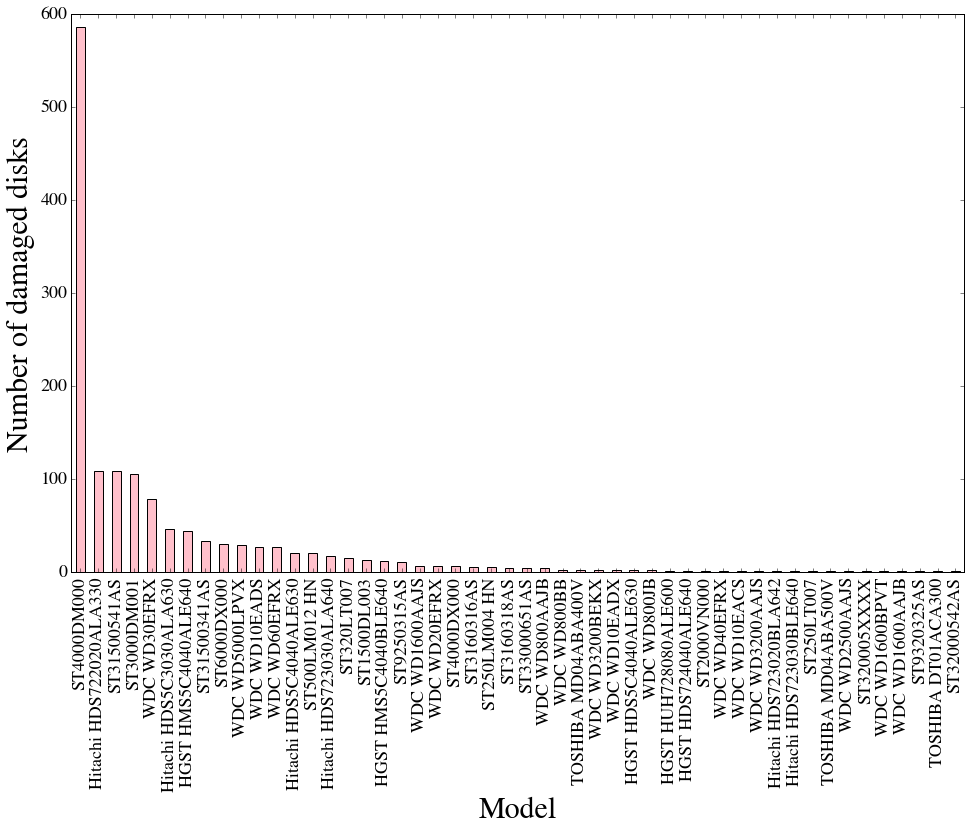

In [314]:
################## 7. Find failures for models  ##########################
# Once a disk fails it is not added in the data anymore. Therefore, here
# it is not necesary to use unique
damaged= data[data.failure==1]
damaged= pd.DataFrame( damaged.groupby('model').size() )
damaged= damaged.reset_index()
damaged.columns= ['model','damaged_disks']
damaged= damaged.sort_values(by='damaged_disks', ascending=False)
ax= damaged.plot(kind= 'bar', x= 'model', y='damaged_disks', 
             legend= False, fontsize=18, color='pink')
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Number of damaged disks', fontsize=30)
## THIS PLOT DOES NOT HAVE MUCH SENSE. The biggest number of damaged disks
## corresponds to the model with more units.
## It is better to plot failure rate per model.

In [62]:
############ 8. Find failure rate as a function of model #################
T1= pd.DataFrame(data.groupby(['model']).serial_number.nunique()).reset_index()
T2= pd.DataFrame(data.groupby(['model']).failure.sum()).reset_index()

In [63]:
T_merged= T1.merge(T2)
T_merged['working_disks']= T_merged.serial_number- T_merged.failure
T_merged['failure_rate']= T_merged.failure/ T_merged.serial_number
T_merged.columns= ['model', 'total_disks', 'failure_disks', 'working_disks', 'failure_rate']
T_merged['success_rate']= T_merged.working_disks/ T_merged.total_disks
T_merged

,model,total_disks,failure_disks,working_disks,failure_rate,success_rate
0,HGST HDS5C4040ALE630,63,3.0,60.0,0.047619,0.952381
1,HGST HDS724040ALE640,42,2.0,40.0,0.047619,0.952381
2,HGST HMS5C4040ALE640,7129,44.0,7085.0,0.006172,0.993828
3,HGST HMS5C4040BLE640,3103,12.0,3091.0,0.003867,0.996133
4,HGST HUH728080ALE600,47,2.0,45.0,0.042553,0.957447
5,Hitachi HDS5C3030ALA630,4606,47.0,4559.0,0.010204,0.989796
6,Hitachi HDS5C3030BLE630,1,0.0,1.0,0.000000,1.000000
7,Hitachi HDS5C4040ALE630,2660,21.0,2639.0,0.007895,0.992105
8,Hitachi HDS722020ALA330,4683,109.0,4574.0,0.023276,0.976724
9,Hitachi HDS723020BLA642,9,1.0,8.0,0.111111,0.888889


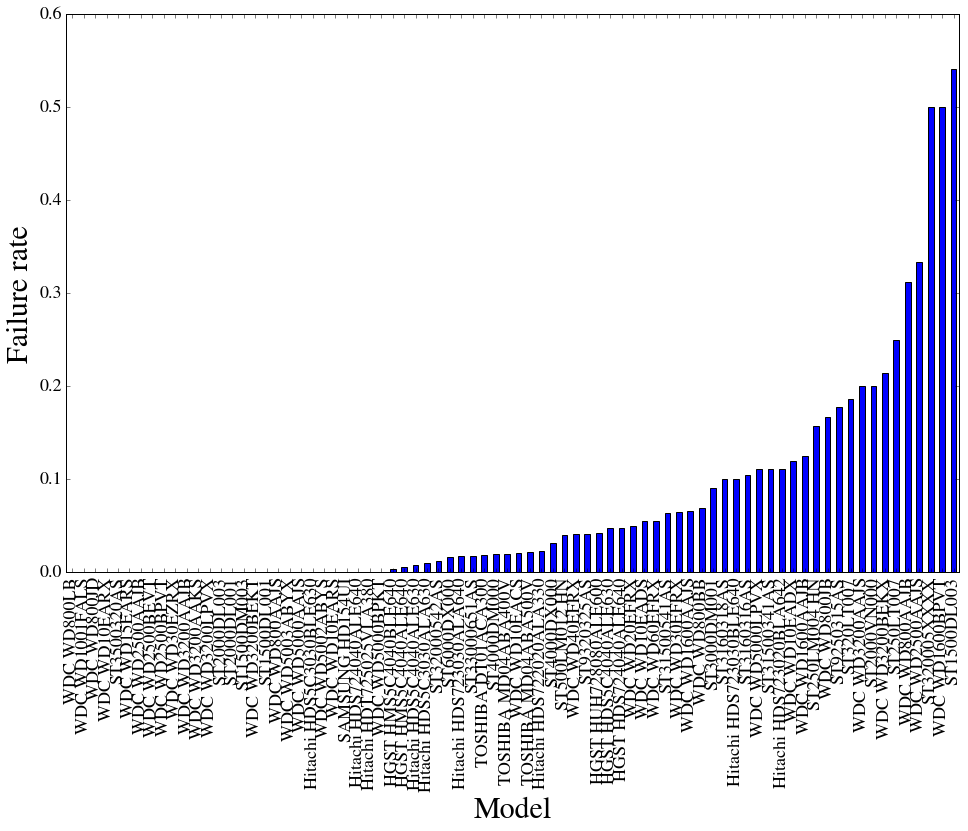

In [64]:
T_merged1= T_merged.sort_values(by='failure_rate', ascending=True)
ax= T_merged1.plot(kind='bar', x='model', y='failure_rate',
               fontsize= 18, legend=False)
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Failure rate', fontsize=30)

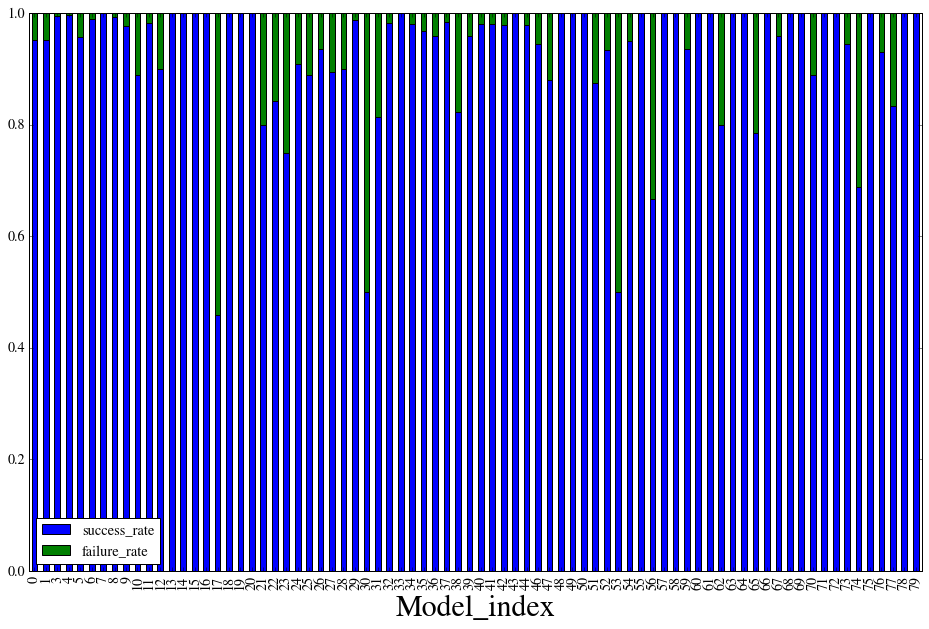

In [438]:
columns=['model', 'success_rate','failure_rate']
T_merged2= T_merged[columns]
ax= T_merged2.plot.bar(stacked=True, fontsize=14)
ax.set_xlabel('Model_index', fontsize=30)
ax.set_ylabel('', fontsize=30)

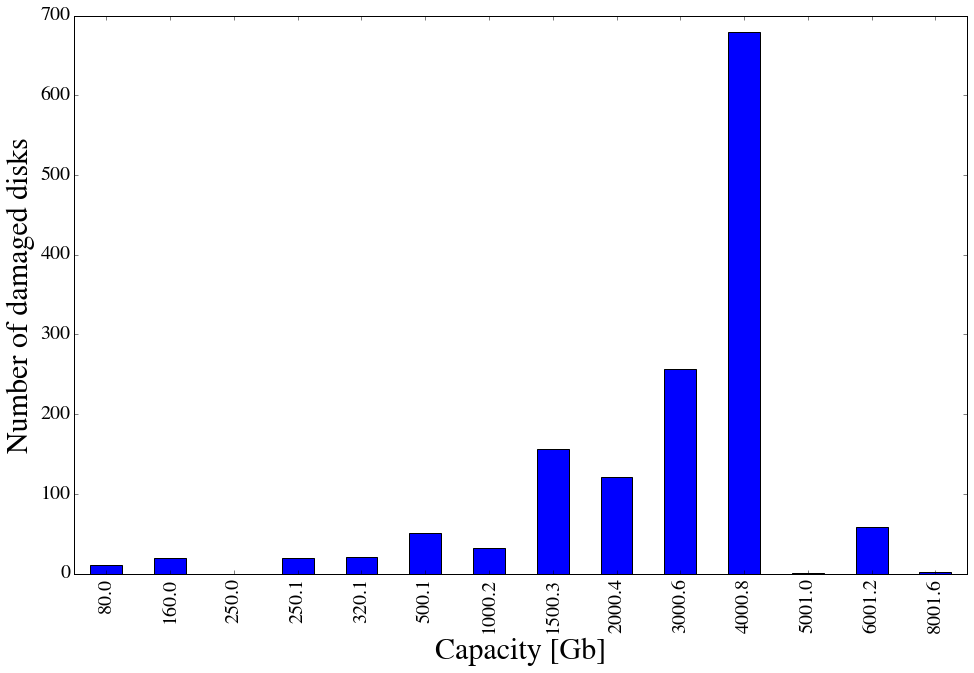

In [7]:
############ 8. find the failure disks as a function of capacity   ########################
 
df_capacity= pd.DataFrame(data.groupby(['capacity_bytes']).failure.sum()).reset_index()
df_capacity= df_capacity[df_capacity.capacity_bytes>0]
df_capacity.capacity_bytes /=1e9
df_capacity.capacity_bytes= df_capacity.capacity_bytes.round(1)
ax= df_capacity.plot(kind='bar', x= 'capacity_bytes', y='failure', 
                 fontsize= 20, legend=False)
ax.set_xlabel('Capacity [Gb]', fontsize=30)
ax.set_ylabel('Number of damaged disks', fontsize=30)
#Conclussion: no apparent relation between capacity and damaged disks
# similar to No. disks Vs. capacity
# This has no sense, because the number of damaged disks corresponds
# to the capacity of the model with more disks. 
# Better to plot the failure rate

In [22]:
df= data.groupby(['capacity_bytes'])
table= pd.DataFrame(df.agg({'serial_number': lambda x: np.size(np.unique(x)),
                            'failure': np.sum }) ).reset_index()
table= table[table.capacity_bytes >0]
table.columns= ['capacity_bytes', 'total_disks', 'damaged_disks']

In [23]:
table['working_disks']= table.total_disks- table.damaged_disks
table['failure_rate']= table.damaged_disks/ table.total_disks 

In [24]:
table['success_rate']= table.working_disks/ table.total_disks 
table.capacity_bytes /= 1e9
table.capacity_bytes= table.capacity_bytes.round(2) 
table.head()

,capacity_bytes,total_disks,damaged_disks,working_disks,failure_rate,success_rate
2,80.03,96,11.0,85.0,0.114583,0.885417
3,160.04,223,20.0,203.0,0.089686,0.910314
4,250.00,1,0.0,1.0,0.000000,1.000000
5,250.06,117,19.0,98.0,0.162393,0.837607
6,320.07,135,21.0,114.0,0.155556,0.844444


In [51]:
#width=0.1
#fig= plt.figure()
#ax= fig.add_subplot(111)
#ax.bar(np.array(table.capacity_bytes/1e3).round(3),np.array(table.failure_rate), width )
#ax.bar(np.array(table.capacity_bytes/1e3).round(3)+width, np.array(table.success_rate), width, color='y' )

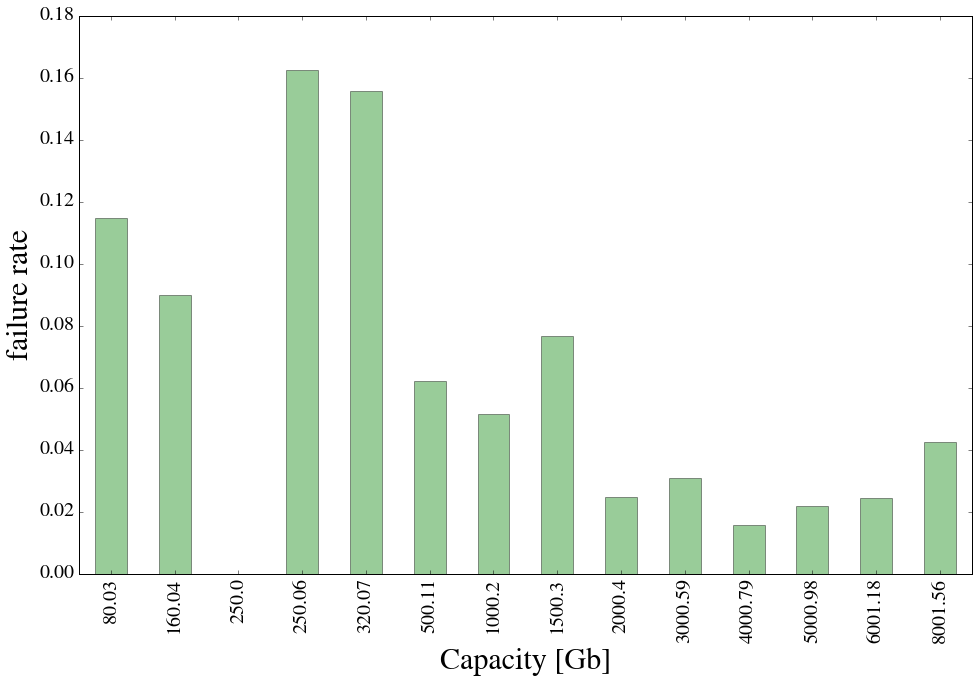

In [56]:
ax= table.plot(kind='bar', x= 'capacity_bytes', y= 'failure_rate',
          fontsize= 20, legend=False, color= 'green', alpha=0.4)
ax.set_xlabel('Capacity [Gb]', fontsize= 30)
ax.set_ylabel('failure rate', fontsize= 30)
#ax.set_ylim(0,1)

In [ ]:
####### Conclusions:
###### So far:  there is a dependence between failure rate and model: 
######          we know which models fail more often
######          there is a dependence between failure rate and capacity:
######          disks of 250 and 320 Gb have bigger failure rate, 
######          however this rate is smaller than 0.2%


In [ ]:
###### 9. find the relation between model, capacity and failure rate ######

In [58]:
df= data.groupby(['model','capacity_bytes'])
table= pd.DataFrame(df.agg({'serial_number': lambda x: np.size(np.unique(x)),
                            'failure': np.sum }) ).reset_index()
table= table[table.capacity_bytes >0]
table.columns= ['model','capacity_bytes', 'total_disks', 'damaged_disks']

In [86]:
table1= table.copy()
table1.capacity_bytes= table1.capacity_bytes/1e12
table1.capacity_bytes= table1.capacity_bytes.round(1)
table1['failure_rate']= table1.damaged_disks/ table1.total_disks
table1.head()

,model,capacity_bytes,total_disks,damaged_disks,failure_rate
0,HGST HDS5C4040ALE630,4.0,63,3.0,0.047619
1,HGST HDS724040ALE640,4.0,42,2.0,0.047619
3,HGST HMS5C4040ALE640,4.0,7129,43.0,0.006032
4,HGST HMS5C4040BLE640,4.0,3103,12.0,0.003867
5,HGST HUH728080ALE600,8.0,47,2.0,0.042553


In [85]:
table2= table1.pivot('model', 'capacity_bytes', 'failure_rate')
table2.fillna(0)

capacity_bytes,0.1,0.2,0.3,0.5,1.0,1.5,2.0,3.0,4.0,5.0,6.0,8.0
model,,,,,,,,,,,,
HGST HDS5C4040ALE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.00000,0.000000
HGST HDS724040ALE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.00000,0.000000
HGST HMS5C4040ALE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.006032,0.0,0.00000,0.000000
HGST HMS5C4040BLE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003867,0.0,0.00000,0.000000
HGST HUH728080ALE600,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.042553
Hitachi HDS5C3030ALA630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.010204,0.000000,0.0,0.00000,0.000000
Hitachi HDS5C3030BLE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
Hitachi HDS5C4040ALE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.007895,0.0,0.00000,0.000000
Hitachi HDS722020ALA330,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.023276,0.000000,0.000000,0.0,0.00000,0.000000


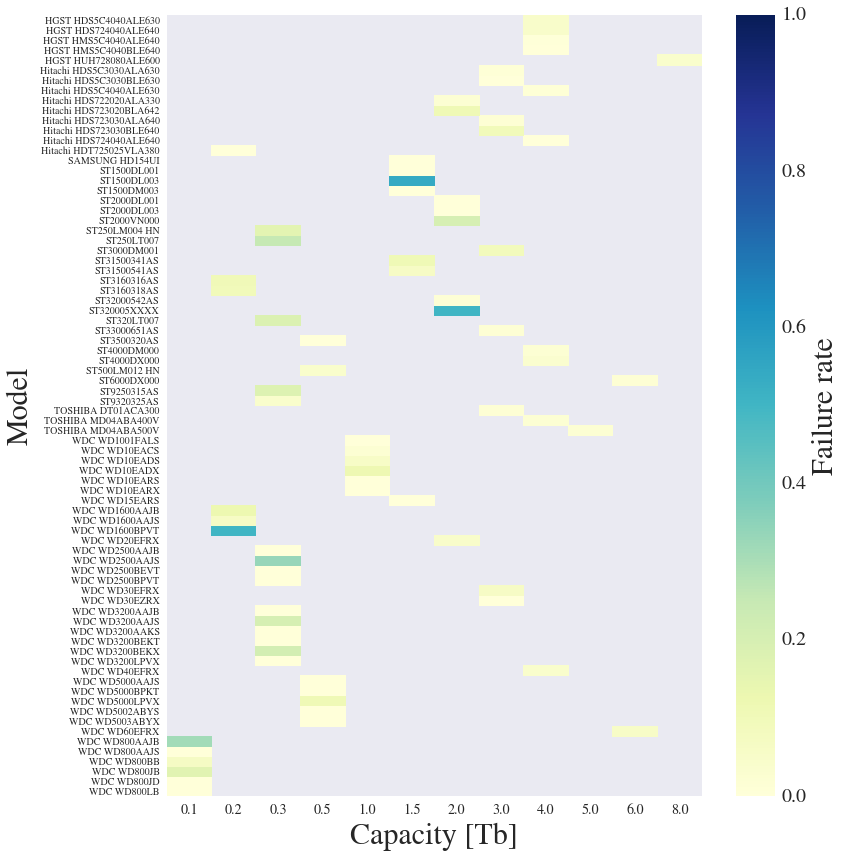

In [168]:
ax= plt.figure(figsize=(12,14))
ax= seaborn.heatmap(table2, cmap="YlGnBu", vmin= 0, vmax= 1)
ax.set_xlabel('Capacity [Tb]', fontsize= 30)
ax.set_ylabel('Model', fontsize= 30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('Failure rate', fontsize= 30)


In [107]:
table1['working_disks']= table1.total_disks-table1.damaged_disks

In [111]:
table1['success_rate']= table1.working_disks/table1.total_disks

In [116]:
table3= table1.pivot('model', 'capacity_bytes', 'success_rate')
table3.fillna(0)

capacity_bytes,0.1,0.2,0.3,0.5,1.0,1.5,2.0,3.0,4.0,5.0,6.0,8.0
model,,,,,,,,,,,,
HGST HDS5C4040ALE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.952381,0.0,0.00000,0.000000
HGST HDS724040ALE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.952381,0.0,0.00000,0.000000
HGST HMS5C4040ALE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.993968,0.0,0.00000,0.000000
HGST HMS5C4040BLE640,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.996133,0.0,0.00000,0.000000
HGST HUH728080ALE600,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.957447
Hitachi HDS5C3030ALA630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.989796,0.000000,0.0,0.00000,0.000000
Hitachi HDS5C3030BLE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.000000
Hitachi HDS5C4040ALE630,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.992105,0.0,0.00000,0.000000
Hitachi HDS722020ALA330,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.976724,0.000000,0.000000,0.0,0.00000,0.000000


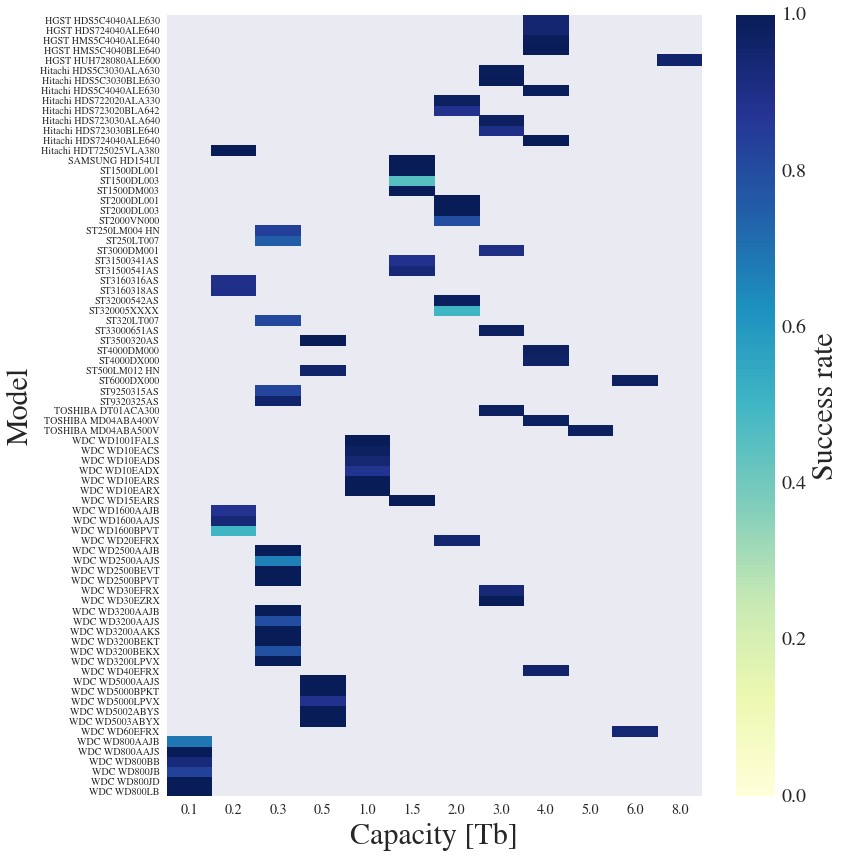

In [166]:
ax= plt.figure(figsize=(12,14))
ax= seaborn.heatmap(table3, cmap="YlGnBu", vmin= 0, vmax= 1)
ax.set_xlabel('Capacity [Tb]', fontsize= 30)
ax.set_ylabel('Model', fontsize= 30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('Success rate', fontsize= 30)


In [130]:
##### 10. How much time do the disks last? ###########
##### Other relations with time ########################
serial= pd.DataFrame( data.groupby(['serial_number']).date.count() ).reset_index()
serial.columns= ['serial_number', 'duration_days']

In [140]:
serial['duration_months']= serial.duration_days/30


In [142]:
serial.describe().round(2)

,duration_days,duration_months
count,62898.00,62898.00
mean,278.38,9.28
std,122.47,4.08
min,1.00,0.03
25%,198.00,6.60
50%,363.00,12.10
75%,363.00,12.10
max,364.00,12.13


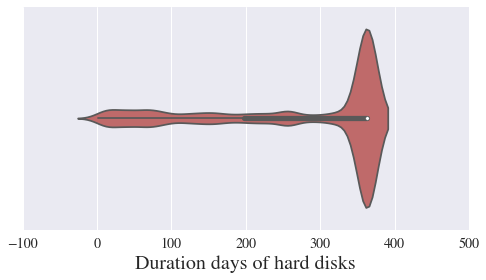

In [171]:
ax= seaborn.violinplot(serial.duration_days, 
                color= seaborn.desaturate('indianred',1))
ax.set_xlabel('Duration days of hard disks', fontsize= 20)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)

In [182]:
####Conclusion: 25% of disks are damaged within six and a half months.
####            On average, the disks lasts one year


In [243]:
days= pd.DataFrame(data.groupby(['serial_number', 'capacity_bytes']).date.count()).reset_index()
days= days[days.capacity_bytes >0]
days.capacity_bytes /= 1e12
days.capacity_bytes= days.capacity_bytes.round(3)

In [244]:
days_pivot= days.pivot('serial_number', 'capacity_bytes', 'date').fillna(0)

In [245]:
days_pivot1= days_pivot.iloc[::700,:]

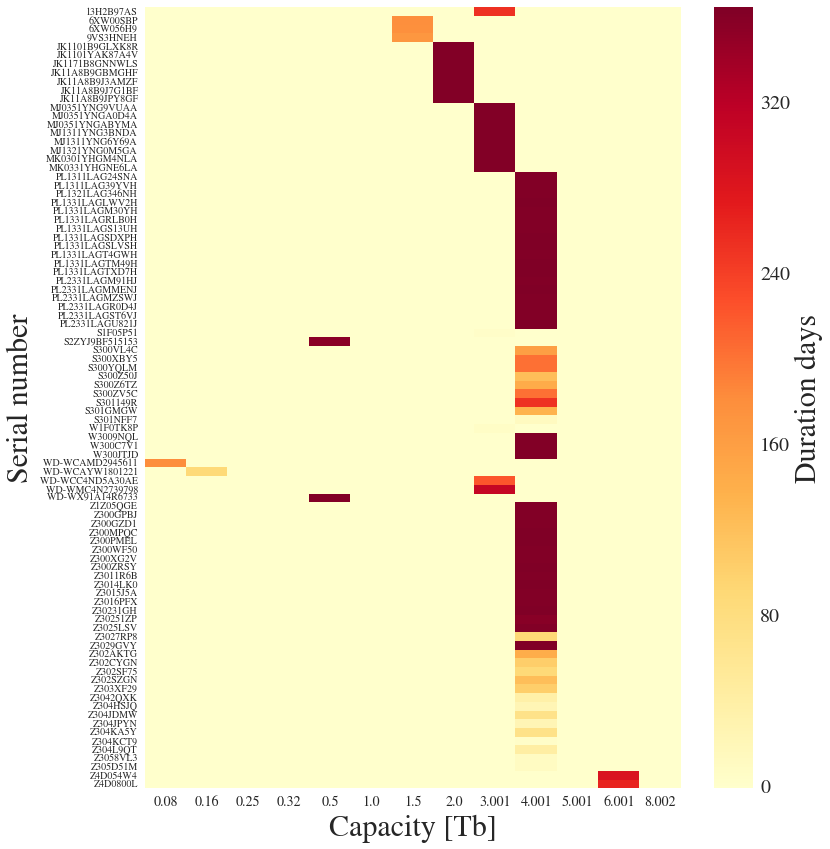

In [246]:
### plotting only 500 hard disks
ax= plt.figure(figsize=(12,14))
ax= seaborn.heatmap(days_pivot1, cmap="YlOrRd", vmin= 0, vmax= 365)
ax.set_xlabel('Capacity [Tb]', fontsize= 30)
ax.set_ylabel('Serial number', fontsize= 30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('Duration days', fontsize= 30)

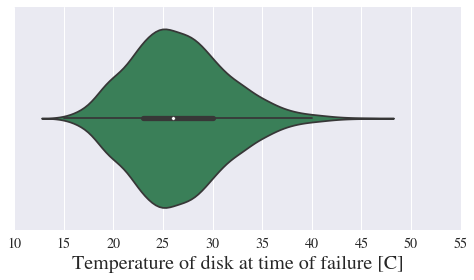

In [290]:
##  11. What is distribution of the disks' temperature 
### by the time they failed
failed_disks= data[data.failure==1]
ax= seaborn.violinplot(failed_disks.smart_194_raw, 
                color='seagreen')
ax.set_xlabel('Temperature of disk at time of failure [C]', fontsize= 20)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)